# Digit Recognizer - The famous MNIST data
__The project's target : Classify a image of a single digit (0-9)__
## So how are we going to do that?
* We will convert our csv files to a normal database.
* We will see the images from both the trainset and the testset.
* We will train and test three different models.
* The model with the best accuracy will be saved for the end-to-end project below.

In [48]:
#First and foremost: make an import to all the necessary libraries

from matplotlib import pyplot as plt
import torch.optim as optim
from Dataset import DigitSet
from torch import nn
import torch
import random
from config import *
from Model1 import Net1, Net2, Net3

In [2]:
#The purpose of the function is to get a tensor and display it as an image

def showData(image):
    plt.imshow(image.permute(1, 2, 0), cmap='gray')
    plt.show()

### Building the dataset:

The full code is at Dataset.py

In [3]:
trainset = DigitSet(root_dir='data', csv_file='train.csv')
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=num_workers)
testset = DigitSet(root_dir='data', csv_file='test.csv', labels_file='result.csv')
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

### Displays the data images
View images from both the train set and the test set - to understand how things go at this dataset.

Label: 3


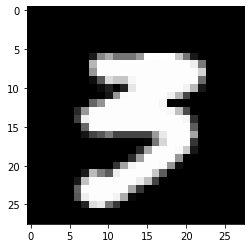

Label: 8


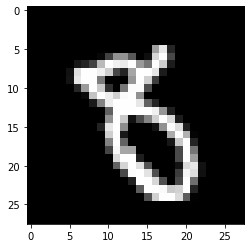

Label: 0


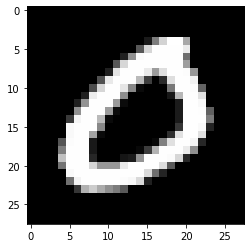

Label: 4


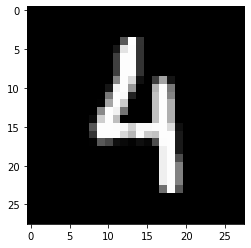

In [4]:
#Display random images & labels from the the train set

index = random.randint(0, trainset.__len__() - 5)

for i in range(index,index+4):
    label, image = trainset[i]
    print("Label:",format(label))
    showData(image)

Label: 9


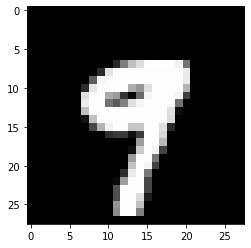

Label: 1


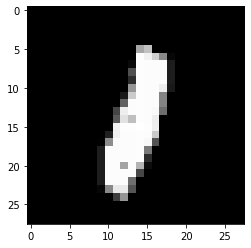

Label: 3


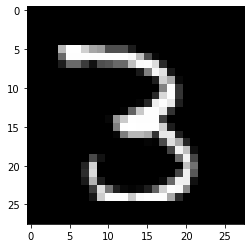

Label: 9


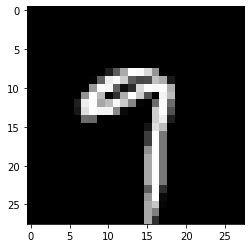

In [5]:
#Display random images & labels from the the train set

index = random.randint(0, testset.__len__() - 5)

for i in range(index,index+4):
    label, image = testset[i]
    print("Label:",format(label))
    showData(image)

### Training and testing the models
In this section we are going to train 3 different models:
* __Model 1 (97.58%)__
* Model 2 (95.34%)
* Model 3 (94.26%)

The model with the highest accerrcy will be saved for later. <br/><br/>
( Note: The decision to put a different number of epochs for each model comes after a considerable training series - feel free to change it in config.py )

In [6]:
#We save the Accuracies to decide on the best algorithm

models = [Net1(), Net2(), Net3()]
Accuracies = []

Model number 1.

==========training==========

Epoch [1/9], Loss: 0.041264241479416895
Epoch [2/9], Loss: 0.020083180332194292
Epoch [3/9], Loss: 0.014668427420358805
Epoch [4/9], Loss: 0.013942003572313476
Epoch [5/9], Loss: 0.012388517326815314
Epoch [6/9], Loss: 0.012802273112683598
Epoch [7/9], Loss: 0.012859406532271347
Epoch [8/9], Loss: 0.0112359710344476
Epoch [9/9], Loss: 0.0111291170569655

Finished Training

loss curve:


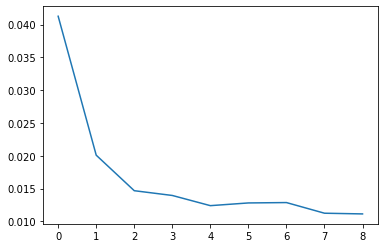


==========testing==========

Accuracy: 97.58% 

Model number 2.

==========training==========

Epoch [1/14], Loss: 0.07482462857985699
Epoch [2/14], Loss: 0.049711482586088734
Epoch [3/14], Loss: 0.040066540960815016
Epoch [4/14], Loss: 0.03765480159363323
Epoch [5/14], Loss: 0.03287398994518491
Epoch [6/14], Loss: 0.03594479893538892
Epoch [7/14], Loss: 0.030958157545403688
Epoch [8/14], Loss: 0.03066921075749764
Epoch [9/14], Loss: 0.03328097797136664
Epoch [10/14], Loss: 0.0338452410616702
Epoch [11/14], Loss: 0.031115624565421735
Epoch [12/14], Loss: 0.03003705012187527
Epoch [13/14], Loss: 0.028951222287593704
Epoch [14/14], Loss: 0.02628552425535415

Finished Training

loss curve:


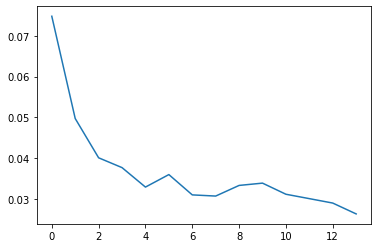


==========testing==========

Accuracy: 95.34% 

Model number 3.

==========training==========

Epoch [1/7], Loss: 0.07897565967486384
Epoch [2/7], Loss: 0.05111077966038749
Epoch [3/7], Loss: 0.04445442617326519
Epoch [4/7], Loss: 0.04007413490670275
Epoch [5/7], Loss: 0.03766624805292085
Epoch [6/7], Loss: 0.036224059915554
Epoch [7/7], Loss: 0.03659716191426333

Finished Training

loss curve:


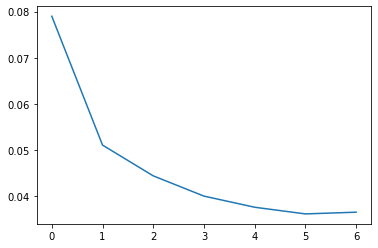


==========testing==========

Accuracy: 94.26% 



In [7]:
for model_number , model in enumerate(models):
    
    # define an optimizer and a loss function
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)
    
    print("Model number {}.\n".format(model_number+1))
    print('==========training==========\n')
    
    total_loss = []
    
    for epoch in range(epochs[model_number]):
        epoch_lost = 0.0
    
        for i, data in enumerate(trainloader, 0):
            # get the inputs
            labels,inputs = data
            
            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = model(inputs.float())
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            #add to epoch_lost
            epoch_lost += loss.item()
        # Saving the total loss of the current epoch
        epoch_lost /= trainset.__len__()    
        print("Epoch [{}/{}], Loss: {}".format(epoch+1,epochs[model_number],epoch_lost))
        total_loss.append(epoch_lost)
    
    print('\nFinished Training\n')

    # Plot a loss curve
    print('loss curve:')
    plt.plot(total_loss)
    plt.show()


    print('\n==========testing==========\n')
    correct = 0
    with torch.no_grad():
        for data in testloader:
            labels, images = data
            outputs = model(images.float())
            predict = torch.argmax(outputs, dim=1)
            correct += (predict == labels).sum().item()

    print("Accuracy: %.2f%% \n" % (100 * correct / testset.__len__()))
    Accuracies.append( (100 * correct / testset.__len__()) )

### Saving the best model

After training the three models we will want to take the best model and save it in its own file.

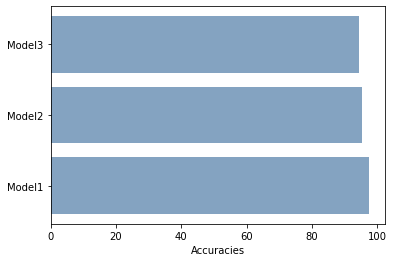

Model1 gave the best performance


In [45]:
fig, ax = plt.subplots()
ax.set_xlabel('Accuracies')
ax.barh(["Model1","Model2","Model3"], Accuracies, color=(0.2, 0.4, 0.6, 0.6))
plt.show()
print("Model1 gave the best performance")

In [46]:
#Saving the model - model 1, and loading it back for a work checking.

PATH = './model.pth'
torch.save(models[0].state_dict(), PATH)
net = Net1()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

Predict Label:7


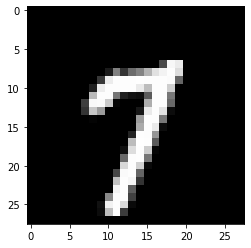

In [49]:
#A small test of loading the model's file back to check that everything works.

label,image = testset[random.randint(0,testset.__len__()-1)]
pred = net(image.float().reshape(1,1,28,28))
print("Predict Label:" + str(torch.argmax(pred).item()))
showData(image)

__Looks good 👍, now we can move on to our mini project.__